# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Image uploaded manually to Colab session storage
# Base64 embedding not used for simplicity
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

Image shape: (384, 512, 3)
Data type: uint8


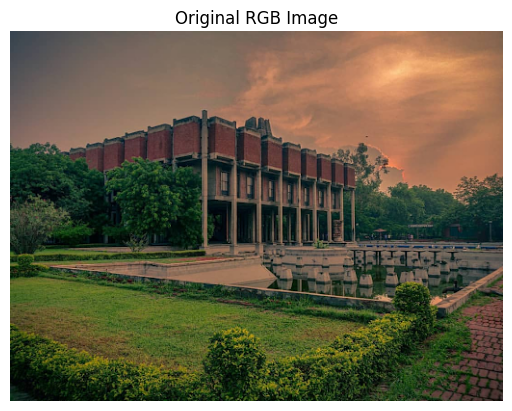

In [ ]:
img = Image.open("myimage.png")
img = np.array(img)
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis("off")
print("Image shape:", img.shape)
print("Data type:", img.dtype)
# The image is loaded as an RGB image with 3 channels (R, G, B)

Grayscale (NumPy) shape: (384, 512)
Sample pixel values (NumPy):
[[65 65 65 65 66]
 [65 65 65 65 66]
 [65 65 65 65 66]
 [65 65 65 65 66]
 [66 66 66 66 67]]


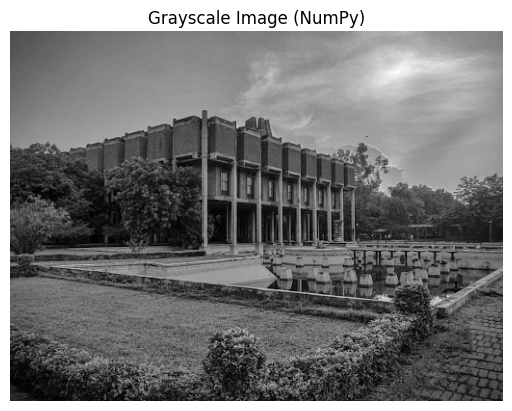

In [ ]:
# Separate RGB channels
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
# Converted to grayscale using weighted sum
gray_np = 0.299 * R + 0.587 * G + 0.114 * B
gray_np = gray_np.astype(np.uint8)
plt.imshow(gray_np, cmap="gray")
plt.title("Grayscale Image (NumPy)")
plt.axis("off")
print("Grayscale (NumPy) shape:", gray_np.shape)
print("Sample pixel values (NumPy):")
print(gray_np[0:5, 0:5])
# Grayscale image has only one channel, hence shape is (H, W)

Grayscale (OpenCV) shape: (384, 512)
Sample pixel values (OpenCV):
[[66 66 66 66 67]
 [66 66 66 66 67]
 [66 66 66 66 67]
 [66 66 66 66 67]
 [67 67 67 67 68]]


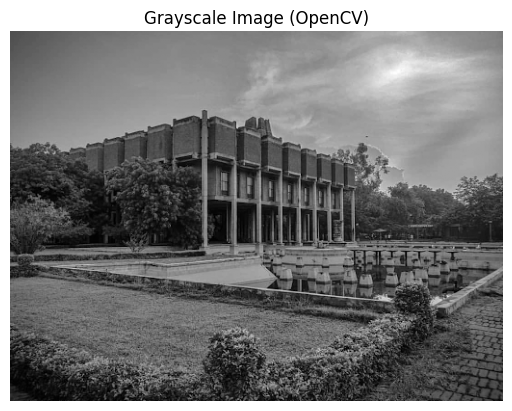

In [ ]:
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_cv, cmap="gray")
plt.title("Grayscale Image (OpenCV)")
plt.axis("off")
print("Grayscale (OpenCV) shape:", gray_cv.shape)
print("Sample pixel values (OpenCV):")
print(gray_cv[0:5, 0:5])

In [ ]:
# Observations:
# 1. RGB image has shape (H,W,3) whereas grayscale images have shape (H,W).
# 2. Both grayscale images look visually similar.
# 3. Pixel values differ slightly due to rounding and internal implementation differences.
# 4. Grayscale conversion reduces the number of channels from 3 to 1.
# The array shapes of both the RGB and grayscale images are printed.

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# B1: Compute 2D FFT of the grayscale image
f = np.fft.fft2(gray_np)
# Shift zero-frequency component to the center
fshift = np.fft.fftshift(f)
# fft2 converts image from spatial domain to frequency domain
# fftshift moves low-frequency components to the center

In [ ]:
# B2: Compute magnitude and phase
magnitude = np.abs(fshift)
phase = np.angle(fshift)
# Magnitude represents strength of frequency components
# Phase represents structural/positional information

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

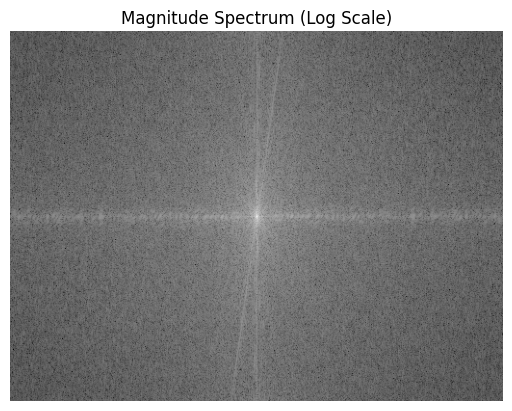

In [ ]:
# Display magnitude spectrum using log scale
plt.imshow(np.log(1 + magnitude), cmap='gray')
plt.title("Magnitude Spectrum (Log Scale)")
plt.axis("off")
# Log scaling is used to compress the wide dynamic range of values

In [ ]:
# Observation:
# The bright region at the center corresponds to low-frequency components.
# Most energy of a natural image is concentrated in low frequencies.

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
rows, cols = gray_np.shape
crow, ccol = rows // 2, cols // 2

In [ ]:
def circular_lpf(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    mask = distance <= radius
    return mask.astype(np.uint8)

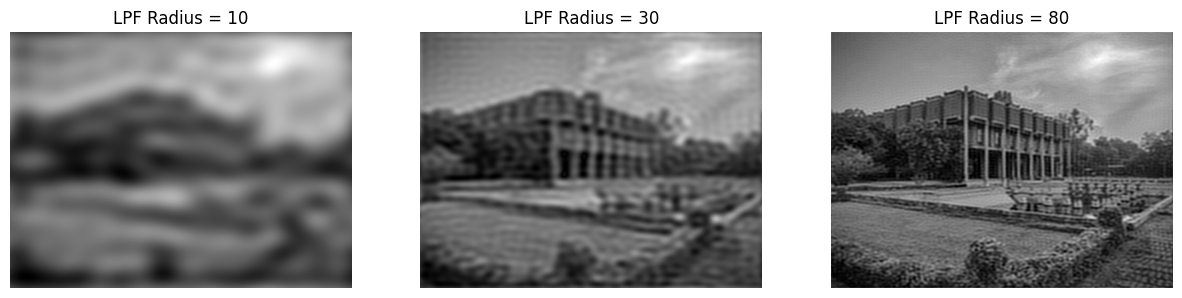

In [ ]:
radii = [10, 30, 80]
plt.figure(figsize=(15, 5))
for i, r in enumerate(radii):
    mask = circular_lpf(gray_np.shape, r)
    # Apply mask in frequency domain
    fshift_lpf = fshift * mask
    # Reconstruct image
    img_back = np.fft.ifft2(np.fft.ifftshift(fshift_lpf))
    img_back = np.abs(img_back)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_back, cmap='gray')
    plt.title(f"LPF Radius = {r}")
    plt.axis("off")
 # Smaller radius retains only very low frequencies, discarding mid and high frequencies, leading to stronger blurring.

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

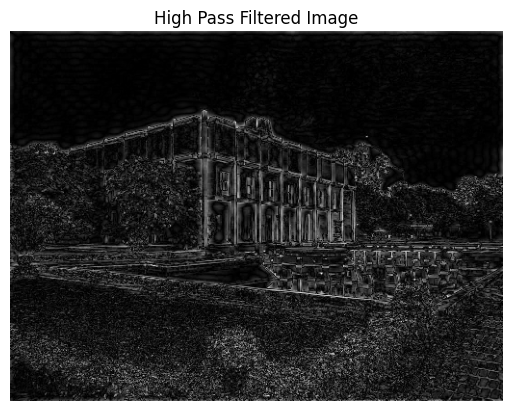

In [ ]:
# Creating HPF mask
lpf_mask = circular_lpf(gray_np.shape, 30)
hpf_mask = 1 - lpf_mask
# Applying HPF
fshift_hpf = fshift * hpf_mask
# Reconstructing image
img_hpf = np.fft.ifft2(np.fft.ifftshift(fshift_hpf))
img_hpf = np.abs(img_hpf)
plt.imshow(img_hpf, cmap='gray')
plt.title("High Pass Filtered Image")
plt.axis("off")

In [ ]:
# High pass filtering removes low frequencies and highlights edges and fine details.

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

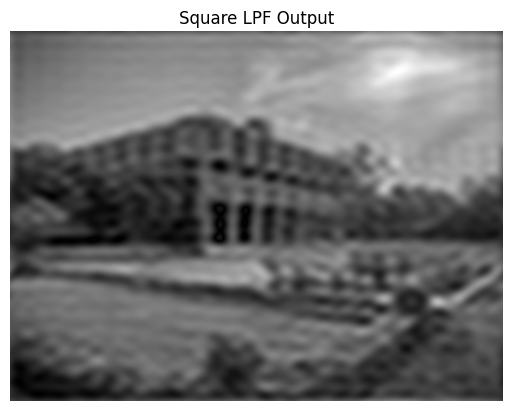

In [ ]:
square_mask = np.zeros_like(gray_np)
half = 25
square_mask[crow-half:crow+half, ccol-half:ccol+half] = 1
fshift_square = fshift * square_mask
img_square = np.fft.ifft2(np.fft.ifftshift(fshift_square))
img_square = np.abs(img_square)
plt.imshow(img_square, cmap='gray')
plt.title("Square LPF Output")
plt.axis("off")

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

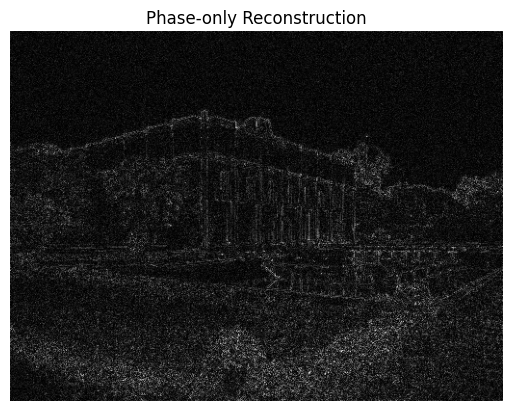

In [ ]:
# D1: Phase-only reconstruction
phase_only = fshift / np.abs(fshift)
img_phase = np.fft.ifft2(np.fft.ifftshift(phase_only))
img_phase = np.abs(img_phase)
plt.imshow(img_phase, cmap='gray')
plt.title("Phase-only Reconstruction")
plt.axis("off")

In [ ]:
# Using fshift / |fshift| preserves the complex exponential e^{iθ}.
# np.angle(fshift) only gives phase values θ and loses magnitude information completely.
# Phase-only reconstruction preserves structural information of the image.

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

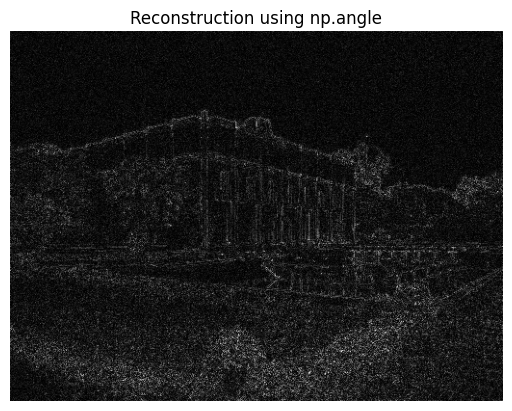

In [ ]:
# Reconstruction using only np.angle (for comparison)
angle_only = np.exp(1j * np.angle(fshift))
img_angle = np.fft.ifft2(np.fft.ifftshift(angle_only))
img_angle = np.abs(img_angle)
plt.imshow(img_angle, cmap='gray')
plt.title("Reconstruction using np.angle")
plt.axis("off")

In [ ]:
# Reconstruction using np.angle works only after converting it back into a complex exponential using exp(iθ).

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

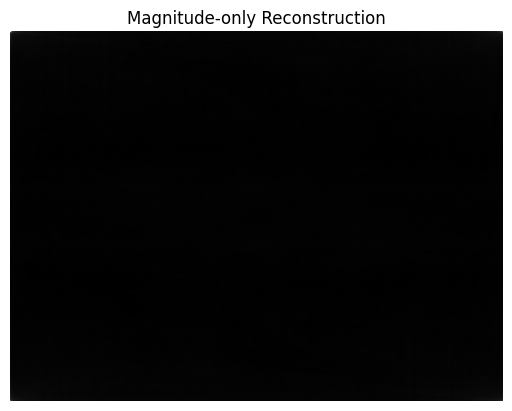

In [ ]:
# D2: Magnitude-only reconstruction
mag_only = magnitude
img_mag = np.fft.ifft2(np.fft.ifftshift(mag_only))
img_mag = np.abs(img_mag)
plt.imshow(img_mag, cmap='gray')
plt.title("Magnitude-only Reconstruction")
plt.axis("off")

In [ ]:
# Magnitude only reconstruction fails to preserve image structure.
# Phase information is essential for spatial localization of features.

In [ ]:
# The logarithm is used while displaying the magnitude spectrum to compress its large dynamic range.
# Reconstruction uses raw magnitude values,hence the appearance differs.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

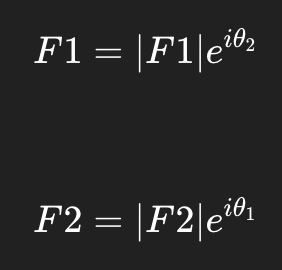

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.
